In [487]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

In [488]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
print(train_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

In [489]:
m=train_df.index.size

In [490]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [491]:
train_df[['Pclass','Survived']].groupby('Pclass',as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [492]:
train_df[['Sex','Survived']].groupby('Sex',as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [493]:
train_df[['Age','Survived']].groupby('Age',as_index=False).mean().sort_values(by="Survived",ascending=False)

,Age,Survived
0,0.42,1.000000
9,5.00,1.000000
79,63.00,1.000000
68,53.00,1.000000
1,0.67,1.000000
17,13.00,1.000000
16,12.00,1.000000
87,80.00,1.000000
2,0.75,1.000000
4,0.92,1.000000


In [494]:
train_df[['SibSp','Survived']].groupby('SibSp',as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [495]:
train_df[['Parch','Survived']].groupby('Parch',as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


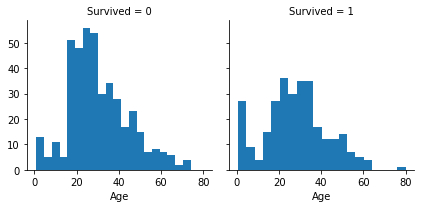

In [496]:
g=sns.FacetGrid(train_df,col="Survived")
g.map(plt.hist,"Age",bins=20)
plt.show()

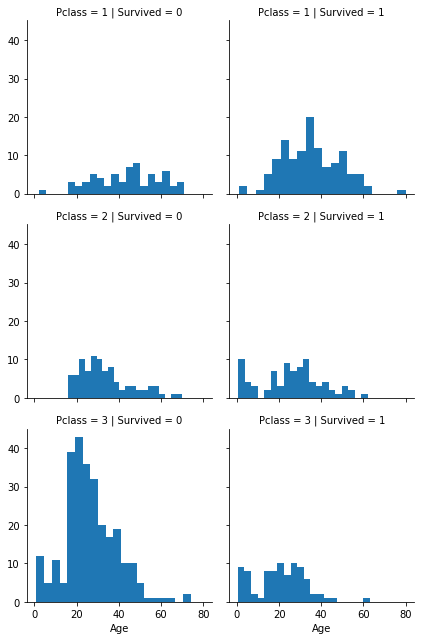

In [497]:
g=sns.FacetGrid(train_df,col="Survived",row="Pclass")
g.map(plt.hist,"Age",bins=20)
plt.show()

e:\python\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
e:\python\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


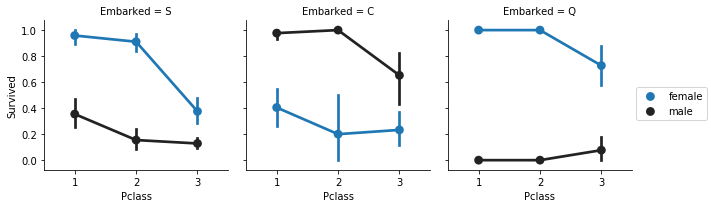

In [498]:
grid=sns.FacetGrid(train_df,col="Embarked")
grid.map(sns.pointplot,"Pclass","Survived","Sex",pallet="deep")
grid.add_legend()
plt.show()

e:\python\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


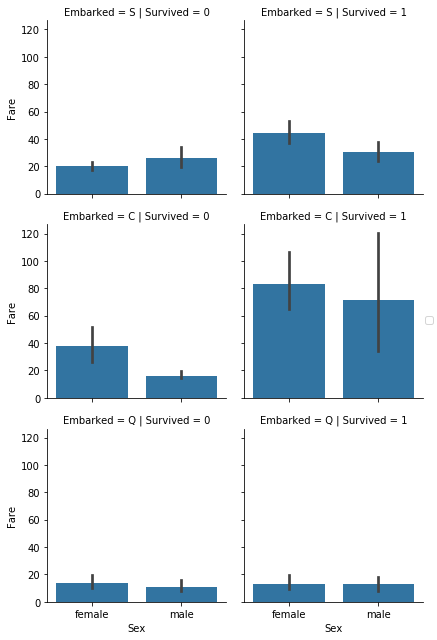

In [499]:
grid=sns.FacetGrid(train_df,row="Embarked",col="Survived")
grid.map(sns.barplot,"Sex","Fare")
grid.add_legend()
plt.show()

In [500]:
train_df=train_df.drop(['Ticket','Cabin'],axis=1)
test_df=test_df.drop(['Ticket','Cabin'],axis=1)
combine=[train_df,test_df]
print(train_df.shape,test_df.shape)

(891, 10) (418, 9)


In [501]:
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(train_df['Title'],train_df["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [502]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Rev','Sir'],"Rare")
    dataset['Title']=dataset['Title'].replace('Mlle','Miss')
    dataset['Title']=dataset['Title'].replace('Ms','Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')
train_df[["Title",'Survived']].groupby("Title",as_index=False).mean().sort_values(by="Survived",ascending=False)


,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [503]:
title_mapping={'Mr':1,'Mrs':2,"Master":3,'Miss':4,"Rare":5}
for dataset in combine:
    dataset["Title"]=dataset["Title"].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [504]:
train_df=train_df.drop(['Name','PassengerId'],axis=1)
test_df=test_df.drop(['Name'],axis=1)
combine=[train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,4
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


In [505]:
for dataset in combine:
    dataset['Sex']=dataset['Sex'].map({'female':1,'male':0}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,2
2,1,3,1,26.0,0,0,7.9250,S,4
3,1,1,1,35.0,1,0,53.1000,S,2
4,0,3,0,35.0,0,0,8.0500,S,1


In [506]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,2
2,1,3,1,26.0,0,0,7.9250,S,4
3,1,1,1,35.0,1,0,53.1000,S,2
4,0,3,0,35.0,0,0,8.0500,S,1


In [507]:
meanMr=train_df[train_df["Title"]==1].mean()["Age"]
meanMrs=train_df[train_df["Title"]==2].mean()["Age"]
meanMaster=train_df[train_df["Title"]==3].mean()["Age"]
meanMiss=train_df[train_df["Title"]==4].mean()["Age"]
for dataset in combine:
    m=dataset.index.size
    for i in range(m):
        if(np.isnan(dataset.loc[i,"Age"])):
            if(dataset.loc[i,"Title"]==1):
                dataset.set_value(i,"Age",meanMr)
            elif(dataset.loc[i,"Title"]==2):
                dataset.set_value(i,"Age",meanMrs)
            elif(dataset.loc[i,"Title"]==3):
                dataset.set_value(i,"Age",meanMaster)
            elif(dataset.loc[i,"Title"]==4):
                dataset.set_value(i,"Age",meanMiss)
            else:
                if(dataset.loc[i,"Sex"]==1):
                    dataset.set_value(i,"Age",meanMr)
                else:
                    dataset.set_value(i,"Age",meanMrs)


In [508]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.000000,1,0,7.2500,S,1
1,1,1,1,38.000000,1,0,71.2833,C,2
2,1,3,1,26.000000,0,0,7.9250,S,4
3,1,1,1,35.000000,1,0,53.1000,S,2
4,0,3,0,35.000000,0,0,8.0500,S,1
5,0,3,0,32.368090,0,0,8.4583,Q,1
6,0,1,0,54.000000,0,0,51.8625,S,1
7,0,3,0,2.000000,3,1,21.0750,S,3
8,1,3,1,27.000000,0,2,11.1333,S,2
9,1,2,1,14.000000,1,0,30.0708,C,2


In [509]:
for dataset in combine:
    dataset["familySize"]=dataset["Parch"]+dataset["SibSp"]+1

train_df[["familySize",'Survived']].groupby(["familySize"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,familySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [510]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,familySize
0,0,3,0,22.0,1,0,7.2500,S,1,2
1,1,1,1,38.0,1,0,71.2833,C,2,2
2,1,3,1,26.0,0,0,7.9250,S,4,1
3,1,1,1,35.0,1,0,53.1000,S,2,2
4,0,3,0,35.0,0,0,8.0500,S,1,1


In [511]:
train_df=train_df.drop(["SibSp","Parch"],axis=1)
test_df=test_df.drop(["SibSp","Parch"],axis=1)

In [512]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,familySize
0,0,3,0,22.0,7.2500,S,1,2
1,1,1,1,38.0,71.2833,C,2,2
2,1,3,1,26.0,7.9250,S,4,1
3,1,1,1,35.0,53.1000,S,2,2
4,0,3,0,35.0,8.0500,S,1,1


In [513]:
combine=[train_df,test_df]
for dataset in combine:
    dataset["isAlone"]=np.where(dataset["familySize"]>1,0,1)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,familySize,isAlone
0,0,3,0,22.0,7.2500,S,1,2,0
1,1,1,1,38.0,71.2833,C,2,2,0
2,1,3,1,26.0,7.9250,S,4,1,1
3,1,1,1,35.0,53.1000,S,2,2,0
4,0,3,0,35.0,8.0500,S,1,1,1


In [514]:
train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [515]:
freq_port= train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [516]:
for dataset in combine:
    dataset["Embarked"]=dataset["Embarked"].fillna(freq_port)
    dataset["Embarked"]=dataset["Embarked"].map({'S':1,'Q':2,'C':3})
    

In [517]:
train_df.head(10)
combine=[train_df,test_df]

In [518]:
train_df['FareBand']=pd.qcut(train_df['Fare'],4)
train_df[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='FareBand',ascending=True)
test_df['Fare'].fillna(test_df['Fare'].dropna().median(),inplace=True)

In [519]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0 
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare']=1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']=2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3 
    dataset['Fare'] = dataset['Fare']
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,familySize,isAlone
0,0,3,0,22.00000,0.0,1,1,2,0
1,1,1,1,38.00000,3.0,3,2,2,0
2,1,3,1,26.00000,1.0,1,4,1,1
3,1,1,1,35.00000,3.0,1,2,2,0
4,0,3,0,35.00000,1.0,1,1,1,1
5,0,3,0,32.36809,1.0,2,1,1,1
6,0,1,0,54.00000,3.0,1,1,1,1
7,0,3,0,2.00000,2.0,1,3,5,0
8,1,3,1,27.00000,1.0,1,2,3,0
9,1,2,1,14.00000,2.0,3,2,2,0


In [520]:
y_train=train_df["Survived"]
x_train=train_df.drop(["Survived","isAlone"],axis=1)
x_test=test_df
x_test=x_test.drop(["PassengerId","isAlone"],axis=1)
print(x_train.shape,y_train.shape,x_test.shape)

(891, 7) (891,) (418, 7)


In [521]:
x_test.isnull().any()

Pclass        False
Sex           False
Age           False
Fare          False
Embarked      False
Title         False
familySize    False
dtype: bool

In [522]:
X_train,X_test,Y_train,Y_test=train_test_split(x_train,y_train,test_size=0.3,random_state=0)


In [523]:
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [524]:
from sklearn.metrics import accuracy_score

In [525]:
# Logistic Regression

logr= LogisticRegression()
logr.fit(X_train_std,Y_train)
Y_pred= logr.predict(X_test_std)
#acc_logr= round(logr.score(x_train,y_train)*100, 2)
print("Accuracy of Logistic Regression is %f"%accuracy_score(Y_test,Y_pred))
#print(acc_logr)

Accuracy of Logistic Regression is 0.798507


In [526]:
print(x_test)
svc= SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
acc_svm1= round(svc.score(x_train,y_train)*100,2)
acc_svm= round(svc.score(x_train,y_train)*100,2)
print("Accuracy of SVM is")
print(acc_svm)
print(acc_svm1)
print(type(y_pred))
df=pd.DataFrame({'Survived':y_pred},test_df["PassengerId"])
#df.to_csv("submission3.csv")

     Pclass  Sex        Age  Fare  Embarked  Title  familySize
0         3    0  34.500000   0.0         2    1.0           1
1         3    1  47.000000   0.0         1    2.0           2
2         2    0  62.000000   1.0         2    1.0           1
3         3    0  27.000000   1.0         1    1.0           1
4         3    1  22.000000   1.0         1    2.0           3
5         3    0  14.000000   1.0         1    1.0           1
6         3    1  30.000000   0.0         2    4.0           1
7         2    0  26.000000   2.0         1    1.0           3
8         3    1  18.000000   0.0         3    2.0           1
9         3    0  21.000000   2.0         1    1.0           3
10        3    0  32.368090   0.0         1    1.0           1
11        1    0  46.000000   2.0         1    1.0           1
12        1    1  23.000000   3.0         1    2.0           2
13        2    0  63.000000   2.0         1    1.0           2
14        1    1  47.000000   3.0         1    2.0     

In [527]:
# K-Nearest Neighbors

knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train[:624],y_train[:624])
y_pred= knn.predict(x_test)
acc_knn= round(knn.score(x_train[:624],y_train[:624])*100,2)
acc_knn1= round(knn.score(x_train[624:],y_train[624:])*100,2)
print("Accuracy of K-Nearest Neighbor is")
print(acc_knn)
print(acc_knn1)

Accuracy of K-Nearest Neighbor is
86.22
77.53


In [528]:
print(y_train.shape)
y_train=y_train.reshape(y_train.shape[0],1).T
x_train=x_train.T
print(y_train.shape)
print(x_train.shape)

(891,)
(1, 891)
(7, 891)


e:\python\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [529]:
X=np.array([[1,-2,3],[4,5,-6]]) #2,3
Y=np.array([[10,20,30]]) #1*3
print(X.shape)
print(Y.shape)

(2, 3)
(1, 3)


In [530]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache=Z
    return A,cache


In [626]:
#sigmoid Backward
def sigmoid_backward(dA, cache):
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    return dZ

#Relu Backward
def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
#     print(Z.shape)
#     print(dZ.shape)
#     # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [627]:
print(sigmoid(1))
print(sigmoid(0))
print(sigmoid(X))

(0.7310585786300049, 1)
(0.5, 0)
(          0         1         2
0  0.731059  0.119203  0.952574
1  0.982014  0.993307  0.002473,    0  1  2
0  1 -2  3
1  4  5 -6)


In [628]:
def relu(Z):
    A=np.maximum(Z,0)
    cache=Z
    return A,Z

In [629]:
print(relu(1))
print(relu(0))
print(relu(X))

(1, 1)
(0, 0)
(   0  1  2
0  1  0  3
1  4  5  0,    0  1  2
0  1 -2  3
1  4  5 -6)


In [630]:
def initialize_params(layer_dims):
    #layer_dims is Layer Dimension
    L=len(layer_dims)
    parameters={}
    for l in range(1,L):
        parameters["W"+str(l)]=np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters["b"+str(l)]=np.zeros((layer_dims[l],1))
    return parameters
        

In [631]:
print(initialize_params([5,4,1])["b1"].shape)

(4, 1)


In [632]:

print(X.shape)
(n_x,n_h,n_y)=layer_sizes(X,Y)
print(str(n_x)+str(n_h)+str(n_y))

(2, 3)
Input layer=2
 Hidden layer=4
 Output layer=1
241


In [633]:
def initialize_parameters(n_x,n_h,n_y):
    np.random.seed(3)
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros([n_h,1])
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros([n_y,1])
    parameters={"W1":W1,"b1":b1,"W2":W2,"b2":b2}
    return parameters

In [634]:
parameters=initialize_parameters(n_x,n_h,n_y)
print(parameters["b1"].shape)

(4, 1)


In [635]:
def forward_propagation(X,parameters):
    W1 = parameters["W1"] #n_h*n_x
    b1 = parameters["b1"] #n_h*1
    W2 = parameters["W2"] #n_y*n_h
    b2 = parameters["b2"] #n_y*1
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2,cache


In [636]:
def compute_cost(A2,Y,parameters):
    m=Y.shape[1]
    cost=-(np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))).sum()/m
    cost=np.squeeze(cost)
    return cost

In [637]:
A2,cache=forward_propagation(X,parameters)
print(compute_cost(A2,Y,parameters))

e:\python\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: unsupported operand type(s) for -: 'int' and 'tuple'

In [638]:
def backward_propagation(X,Y,parameter,cache):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    dZ2 = A2-Y
    dW2 = np.dot(dZ2,A1.T)/m
    db2 = np.sum(dZ2,axis=1,keepdims=True)/m
    dZ1 = np.dot(W2.T,dZ2)*(1-np.tanh(cache["Z1"])**2)
    dW1 = np.dot(dZ1,X.T)/m
    db1 = np.sum(dZ1,axis=1,keepdims=True)/m
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    return grads
    

In [639]:
def update_parameters(parameters,grads,learning_rate=1.2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [640]:
def NN_model(X,Y,n_h,num_iterations=50000,print_cost=False):
    np.random.seed(2)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    parameters =initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    for i in range(num_iterations):
        A2, cache = forward_propagation(X,parameters)
        cost = compute_cost(A2,Y,parameters)
        grads = backward_propagation(X,Y,parameters,cache)
        parameters = update_parameters(parameters,grads)
        if print_cost and i % 10000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return parameters

In [641]:
def predict(parameters,X):
    A2, cache = forward_propagation(X,parameters)
    predictions = np.where(A2>=0.5,1,0)
    return predictions


In [642]:
X=pd.DataFrame(X)
print(X.loc[:,0:1])

   0  1
0  1 -2
1  4  5


In [643]:
print(x_train.shape[0])
print(y_train[:,:624].shape)
parameters = NN_model(x_train, y_train, n_h = 4, num_iterations = 50000, print_cost=True)

7
(1, 624)
Input layer=7
 Hidden layer=4
 Output layer=1
Input layer=7
 Hidden layer=4
 Output layer=1


e:\python\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: unsupported operand type(s) for -: 'int' and 'tuple'

In [644]:
predictions = predict(parameters, x_train)
print(predictions)
print ('Accuracy: %d' % float((np.dot(y_train,predictions.T) + np.dot(1-y_train,1-predictions.T))/float(y_train.size)*100) + '%')

ValueError: shapes (4,2) and (7,891) not aligned: 2 (dim 1) != 7 (dim 0)

In [645]:
predictions=predict(parameters,x_test.T)

ValueError: shapes (4,2) and (7,418) not aligned: 2 (dim 1) != 7 (dim 0)

In [646]:
predictions.shape

(418,)

In [647]:
#predictions=predictions.T
predictions.shape

(418,)

In [648]:
data={"Survived":predictions}
predictions=np.squeeze(predictions)
print(predictions.shape)
print(test_df["PassengerId"])
df=pd.DataFrame({'Survived':predictions},index=test_df["PassengerId"].values)
df.to_csv("submission4.csv")

(418,)
0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64


In [649]:
def linear_forward(A,W,b):
    Z=np.dot(W,A)+b
    cache=(A,W,b)
    return Z,cache

In [650]:
print(X.shape)
W=np.array(np.random.randn(1,2))
b=np.zeros([1,1])
Z,cache=linear_forward(X,W,b)
print(Z.shape)
print(cache)

(2, 3)
(1, 3)
(   0  1  2
0  1 -2  3
1  4  5 -6, array([[-1.24412333, -0.62641691]]), array([[ 0.]]))


In [651]:
def linear_activation_forward(A_prev,W,b,activation):
    Z,linear_cache=linear_forward(A=A_prev,W=W,b=b)
    if activation=="sigmoid":
        A,activation_cache=sigmoid(Z)
    elif activation=="relu":
        A,activation_cache=sigmoid(Z)
    else:
        print("Invalid activation function")
    cache=(linear_cache,activation_cache) #Cache=((A_prev,W,b),Z)
    return A,cache

In [652]:
def L_model_forward(X,parameters):
    caches=[]
    L=len(parameters)//2 #L=No of layers
    A=X
    for l in range(1,L):
        A_prev=A
        A,cache=linear_activation_forward(A_prev,W=parameters["W"+str(l)],b=parameters["b"+str(l)],activation="relu")
        caches.append(cache)
    AL,cache=linear_activation_forward(A,W=parameters["W"+str(L)],b=parameters["b"+str(L)],activation="sigmoid")
    caches.append(cache)
    return AL,caches

In [653]:
def compute_cost(Y,AL):
    m=Y.shape[1]
    cost=-(Y*np.log(AL)+(1-Y)*np.log(1-AL)).sum()/m
    return cost

In [654]:
def linear_backward(dZ,cache):
    A_prev,W,b=cache
    m=A_prev.shape[1]
    
    dW=np.dot(dZ,A_prev.T)/m
    db=np.sum(dZ,axis=1,keepdims=True)/m
    dA_prev=np.dot(W.T,dZ)
    return dA_prev,dW,db

In [655]:
def linear_activation_backward(dA,cache,activation):
    linear_cache,activation_cache=cache
    if activation=="relu":
        dZ=relu_backward(dA,cache=activation_cache)
        dA_prev,dW,db=linear_backward(dZ,linear_cache)
    elif activation=="sigmoid":
        dZ=sigmoid_backward(dA,cache=activation_cache)
        dA_prev,dW,db=linear_backward(dZ,linear_cache)
    else:
        print("Invalid Choice")
    return dA_prev,dW,db

In [656]:
def L_model_backward(AL,Y,caches):
    grads={}
    L=len(caches)
    m=AL.shape[1]
    Y=Y.reshape(AL.shape)
    
    dAL=-(Y/AL-(1-Y)/(1-AL))
    current_cache=caches[-1]
    grads["dA"+str(L)],grads["dW"+str(L)],grads["db"+str(L)]=linear_activation_backward(dAL,current_cache,activation="sigmoid")
    for l in reversed(range(L-1)):
        #print(f"Layer {l+1} is done")
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache,activation="relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    
    return grads

In [657]:
def update_parameters(parameters,grads,learning_rate):
    L=len(parameters)//2
    for l in range(L):
        parameters["W"+str(l+1)]=parameters["W"+str(l+1)]-learning_rate*grads["dW"+str(l+1)]
        parameters["b"+str(l+1)]=parameters["b"+str(l+1)]-learning_rate*grads["db"+str(l+1)]
    return parameters

In [677]:
def L_layer_model(X,Y,layers_dims,learning_rate=0.5,num_iterations=10000,print_cost=True):
    costs=[]
    parameters=initialize_params(layer_dims=layers_dims)
    for i in range(num_iterations):
        AL,caches=L_model_forward(X=X,parameters=parameters)
        cost=compute_cost(Y,AL)
        if(i%10000==0):
            print(f"Cost after {i} iterations"+str(cost))
        costs.append(cost)
        grads=L_model_backward(AL,Y,caches=caches)
        parameters=update_parameters(parameters=parameters,grads=grads,learning_rate=learning_rate)
        #Plot the cost
    plt.plot(np.squeeze(costs))
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title(f"learning rate= {learning_rate}")
    plt.show()
        
    return costs

Cost after 0 iterations0.687129717522


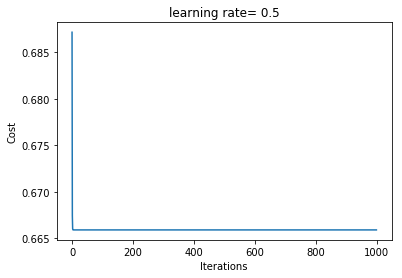

In [678]:
layers_dims=[x_train.shape[0],20,40,20,1]
parameters=L_layer_model(x_train,y_train,layers_dims=layers_dims,num_iterations=1000,print_cost=True)